<img src="./logo_UNSAM.jpg" align="right" width="150" />  -->

#### Análisis y procesamiento de señales

# Trabajo Práctico Nº4
#### Santiago Manuel Corral

## Introducción

In [41]:
- Explicación Welch
- Señales a tratar 
- Fin de la estimación (BW)

SyntaxError: invalid syntax (4243664208.py, line 1)

## Código y Análisis

Para el análisis espectral de las señales se decidió estimar con el método de Welch y con la ventana Hamming. Esto nos da una relación varianza, resolución espectral la cual se considero adecuada dados los objetivos del análisis. La estimación por Welch mejora en gran medida la varianza gracias a el promedio de segmentos. Además la ventana reduce los efectos del solapamiento y leakage espectral de los mismos. Se varió el solapamiento de los segmentos para cada señal según se consideraba optima la representación del espectro. 
- Señal de ECG: N/6
- Señal de PPG: N/32
- Señal de Audio: N/16
  
(Siendo N el numero total de muestras)

Para cada señal se verificó el Teorema de Parseval, dado que se analiza el ancho de banda según la potencia acumulada en frecuencia, se procura de esta manera analizar la correcta densidad espectral de potencia, verificando su relación con la señal temporal. 



Importo librerías:

In [ ]:
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt
   
import scipy.io as sio

def vertical_flaten(a):
    return a.reshape(a.shape[0],1)

#### ECG
Lectura de datos:

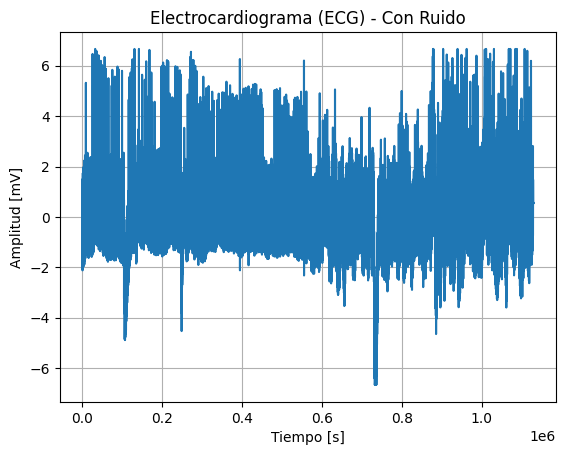

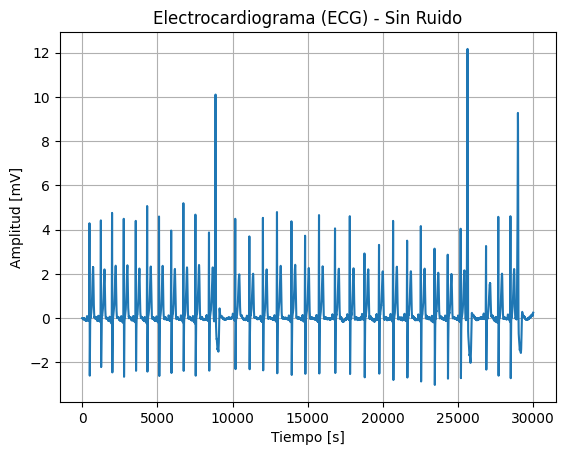

In [53]:
fs_ecg = 1000 # Hz, ECG

#ECG Con ruido
mat_struct = sio.loadmat('./ECG_TP4.mat')
ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N1 = len(ecg_one_lead)
ecg_one_lead_n = ecg_one_lead/np.std(ecg_one_lead) #normalizo, divido por el maximo de la señal

plt.figure()
plt.plot(ecg_one_lead_n)
plt.ylabel('Amplitud [mV]')
plt.xlabel('Tiempo [s]')
plt.title("Electrocardiograma (ECG) - Con Ruido")
plt.grid()

#ECG sin ruido
ecg_one_lead = np.load('ecg_sin_ruido.npy')
N2 = len(ecg_one_lead)
ecg_one_lead = ecg_one_lead/np.std(ecg_one_lead) #normalizo, divido por el maximo de la señal

plt.figure()
plt.plot(ecg_one_lead)
plt.ylabel('Amplitud [mV]')
plt.xlabel('Tiempo [s]')
plt.title("Electrocardiograma (ECG) - Sin Ruido");
plt.grid()

Estimo la respuesta en frecuencia con el método de Welch:

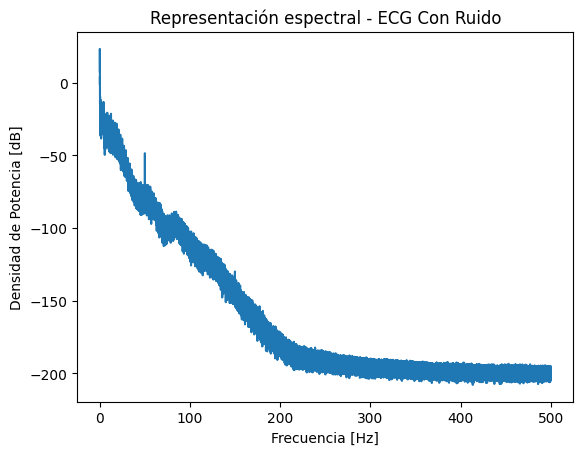

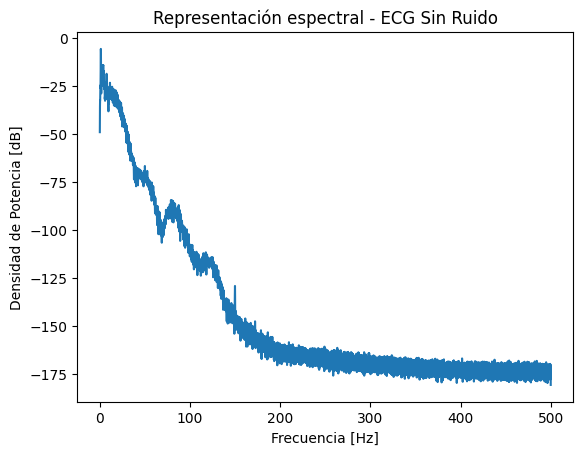

In [52]:
(fwelch_ecgn, pxx_ecgn) = sp.signal.welch(ecg_one_lead_n, fs_ecg ,nfft = N1, window = 'hamming', nperseg = N1//6, axis = 0)
(fwelch_ecg, pxx_ecg) = sp.signal.welch(ecg_one_lead, fs_ecg ,nfft = N2, window = 'hamming', nperseg = N2//6, axis = 0)

#Ecg con ruido
plt.figure()
bfrec = fwelch_ecgn <= fs_ecg/2
plt.plot(fwelch_ecgn, 10*np.log10(2*np.abs(pxx_ecgn[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - ECG Con Ruido")

#Ecg sin ruido
plt.figure()
bfrec = fwelch_ecg <= fs_ecg/2  
plt.plot(fwelch_ecg, 10*np.log10(2*np.abs(pxx_ecg[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - ECG Sin Ruido");

Verifico el teorema de Parseval:

In [51]:
#ECG con ruido
area = np.sum(ecg_one_lead_n**2)

fftecg = np.fft.fft(ecg_one_lead_n.flatten())
energia_espectral = np.mean(np.abs(fftecg)**2) #Mas sencillamente con el valor medio (ver notas)

parseval_ecg_n = np.abs(area - energia_espectral)
print(parseval_ecg_n)

#ECG sin ruido
area = np.sum(ecg_one_lead**2)

fftecg = np.fft.fft(ecg_one_lead.flatten())
energia_espectral = np.mean(np.abs(fftecg)**2) #Mas sencillamente con el valor medio (ver notas)

parseval_ecg = np.abs(area - energia_espectral)
print(parseval_ecg)

4.656612873077393e-10
3.637978807091713e-12


Buscamos un error cercano a cero, lo cual verifica nuestros resultados. 

Calculamos el ancho de banda:


Buscamos el índice de la sumatoria en el que se alcanzan valores del 95% y 98% de la potencia acumulada total, entendiendo que la potencia e información de la señal real se encuentra comprendido en ese rango de frecuencias. 

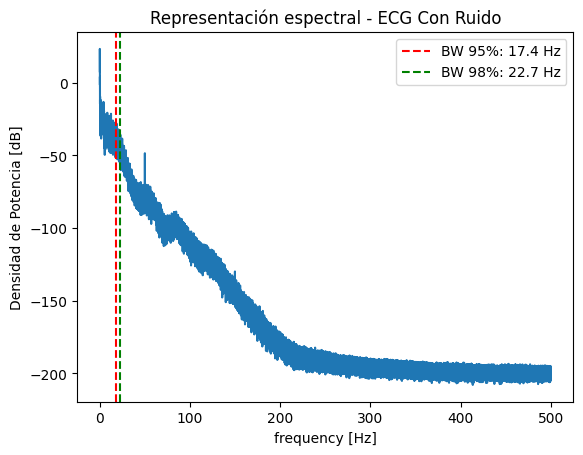

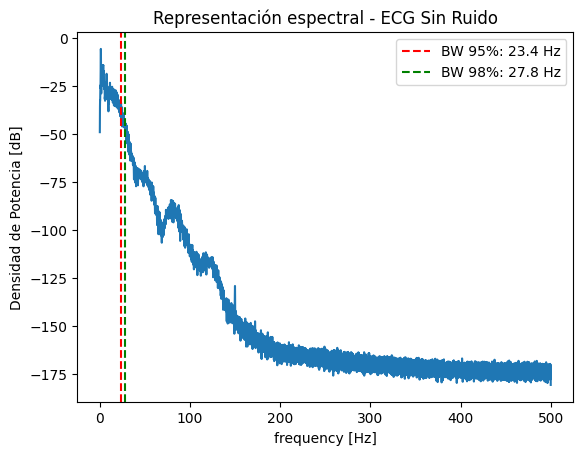

In [50]:
#Potencia total de la señal 
potencia_total_ecgn = np.sum(pxx_ecgn) #Devuelve un valor
potencia_total_ecg = np.sum(pxx_ecg)
    
#Potencia acumulada
potencia_acumulada_ecgn = np.cumsum(pxx_ecgn) #Devuelve un vector con los pasos de la sumatoria
potencia_acumulada_ecg = np.cumsum(pxx_ecg)

#Umbrales    
umbral_95_n = 0.95 * potencia_total_ecgn
umbral_98_n = 0.98 * potencia_total_ecgn
    
umbral_95 = 0.95 * potencia_total_ecg
umbral_98 = 0.98 * potencia_total_ecg

#Indice en el que se llega al umbral
idc_95_n = np.argmax(potencia_acumulada_ecgn >= umbral_95_n)
idc_98_n = np.argmax(potencia_acumulada_ecgn >= umbral_98_n)

idc_95 = np.argmax(potencia_acumulada_ecg >= umbral_95)
idc_98 = np.argmax(potencia_acumulada_ecg >= umbral_98)
    
#Bw
BW_95_n = fwelch_ecgn[idc_95_n] #Freq a la que se llega al indice
BW_98_n = fwelch_ecgn[idc_98_n]

BW_95 = fwelch_ecg[idc_95]
BW_98 = fwelch_ecg[idc_98]

#Grafico BW
#ECG con ruido
plt.figure()
bfrec = fwelch_ecgn <= fs_ecg/2
plt.plot(fwelch_ecgn, 10*np.log10(2*np.abs(pxx_ecgn[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - ECG Con Ruido")
plt.xlabel('frequency [Hz]')
plt.axvline(BW_95_n, color='r', linestyle='--', label=f'BW 95%: {BW_95_n:.1f} Hz')
plt.axvline(BW_98_n, color='g', linestyle='--', label=f'BW 98%: {BW_98_n:.1f} Hz')
plt.legend()

#ECG sin ruido
plt.figure()
bfrec = fwelch_ecg <= fs_ecg/2
plt.plot(fwelch_ecg, 10*np.log10(2*np.abs(pxx_ecg[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - ECG Sin Ruido")
plt.xlabel('frequency [Hz]')
plt.axvline(BW_95, color='r', linestyle='--', label=f'BW 95%: {BW_95:.1f} Hz')
plt.axvline(BW_98, color='g', linestyle='--', label=f'BW 98%: {BW_98:.1f} Hz')
plt.legend();

#### PPG
Lectura de datos:

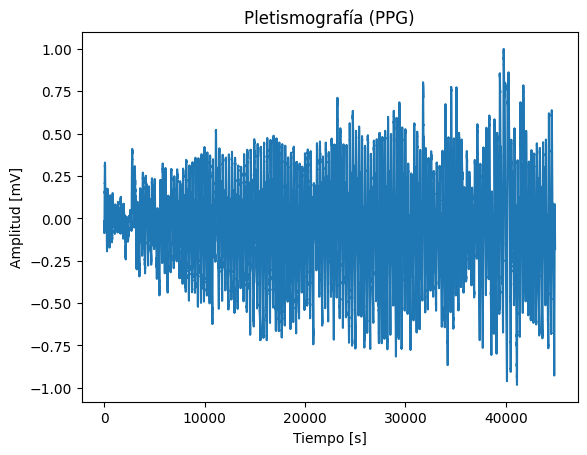

In [49]:
fs_ppg = 1000 # Hz

# Cargar el archivo CSV como un array de NumPy
ppg = np.load('ppg_sin_ruido.npy')

#Normalizo
ppg = ppg / np.max(ppg)

plt.figure()
plt.plot(ppg)
plt.ylabel('Amplitud [mV]')
plt.xlabel('Tiempo [s]')
plt.title("Pletismografía (PPG)");

Estimo la respuesta en frecuencia con el método de Welch:

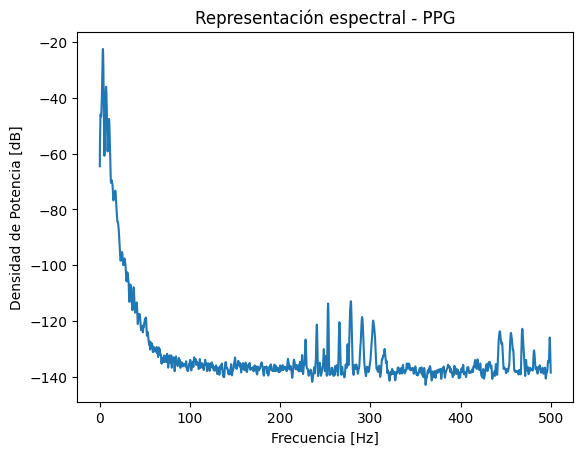

In [48]:
N = len(ppg)
df = fs_ppg/N
(fwelch_ppg , pxx_ppg) = sp.signal.welch(ppg, fs_ppg , nfft = N, window = 'hamming', nperseg = N//32, axis = 0)

#PPG Espectro
plt.figure()
bfrec = fwelch_ppg <= fs_ppg/2
plt.plot(fwelch_ppg, 10*np.log10(2*np.abs(pxx_ppg[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - PPG");

Verifico el teorema de Parseval:

In [42]:
#PPG sin ruido
area = np.sum(ppg**2)

fftppg = np.fft.fft(ppg.flatten())
energia_espectral = np.mean(np.abs(fftppg)**2) #Mas sencillamente con el valor medio (ver notas)

parseval_ppg = np.abs(area - energia_espectral)

print(parseval_ppg)

9.094947017729282e-13


Buscamos un error cercano a cero, lo cual verifica nuestros resultados. 



Calculamos el ancho de banda:


Buscamos el índice de la sumatoria en el que se alcanzan valores del 95% y 98% de la potencia acumulada total, entendiendo que la potencia e información de la señal real se encuentra comprendido en ese rango de frecuencias. 

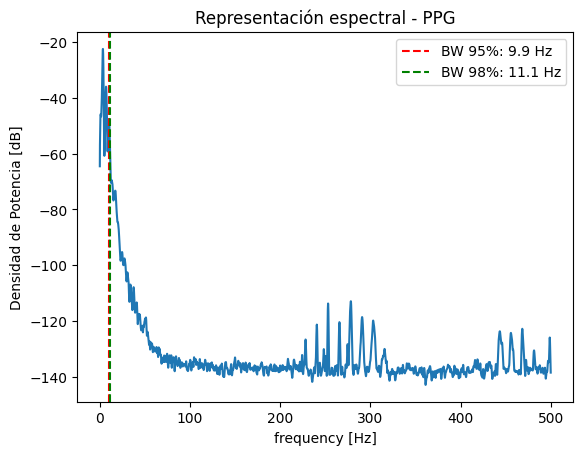

In [43]:
#Potencia total de la señal 
potencia_total_ppg = np.sum(pxx_ppg) #Devuelve un valor
    
#Potencia acumulada
potencia_acumulada_ppg = np.cumsum(pxx_ppg) #Devuelve un vector con los pasos de la sumatoria

#Umbrales    
umbral_95 = 0.95 * potencia_total_ppg
umbral_98 = 0.98 * potencia_total_ppg

#Indice en el que se llega al umbral
idc_95 = np.argmax(potencia_acumulada_ppg >= umbral_95)
idc_98 = np.argmax(potencia_acumulada_ppg >= umbral_98)
    
#Bw
BW_95 = fwelch_ppg[idc_95]
BW_98 = fwelch_ppg[idc_98]

#Grafico BW
#ECG con ruido
plt.figure()
bfrec = fwelch_ppg <= fs_ppg/2
plt.plot(fwelch_ppg, 10*np.log10(2*np.abs(pxx_ppg[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - PPG")
plt.xlabel('frequency [Hz]')
plt.axvline(BW_95, color='r', linestyle='--', label=f'BW 95%: {BW_95:.1f} Hz')
plt.axvline(BW_98, color='g', linestyle='--', label=f'BW 98%: {BW_98:.1f} Hz')
plt.legend();


#### Señales de Audio
Lectura de datos:

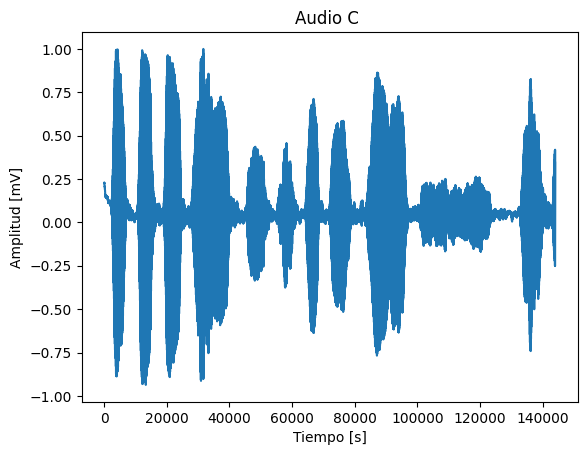

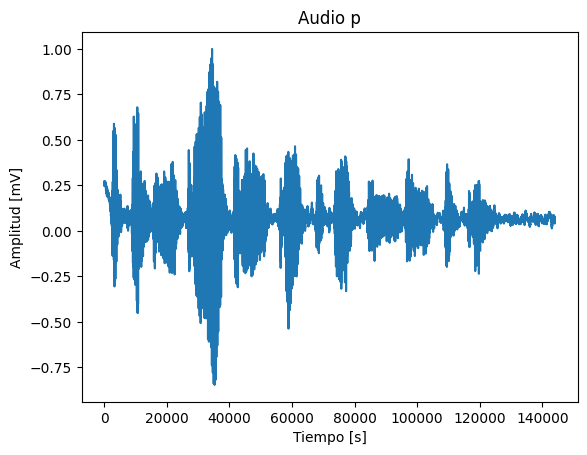

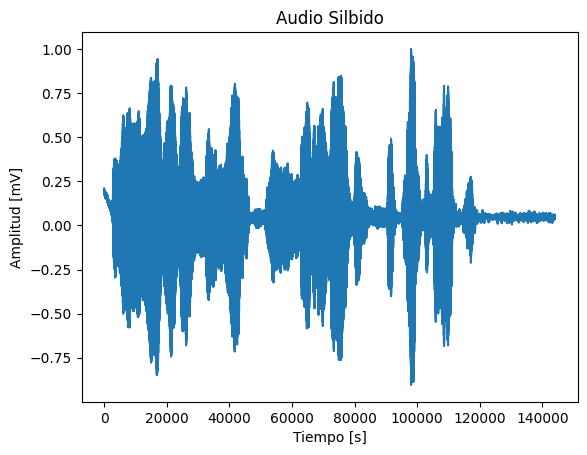

In [44]:
#Cargar el archivo CSV como un array de NumPy
fs_audio_c, wav_data_c = sio.wavfile.read('la cucaracha.wav')
fs_audio_p, wav_data_p = sio.wavfile.read('prueba psd.wav')
fs_audio_s, wav_data_s = sio.wavfile.read('silbido.wav')

#Normalizo
wav_data_c = wav_data_c / np.max(wav_data_c)
wav_data_p = wav_data_p / np.max(wav_data_p)
wav_data_s = wav_data_s / np.max(wav_data_s)

#Representación temporal
plt.figure()
plt.plot(wav_data_c)
plt.ylabel('Amplitud [mV]')
plt.xlabel('Tiempo [s]')
plt.title("Audio C ")

plt.figure()
plt.plot(wav_data_p)
plt.ylabel('Amplitud [mV]')
plt.xlabel('Tiempo [s]')
plt.title("Audio p")

plt.figure()
plt.plot(wav_data_s)
plt.ylabel('Amplitud [mV]')
plt.xlabel('Tiempo [s]')
plt.title("Audio Silbido");

Estimo la respuesta en frecuencia con el método de Welch:

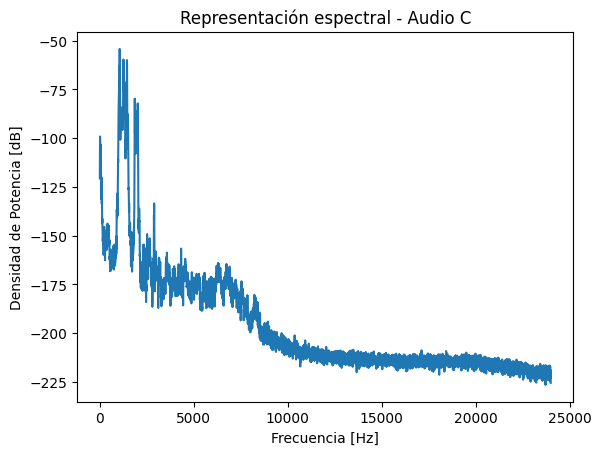

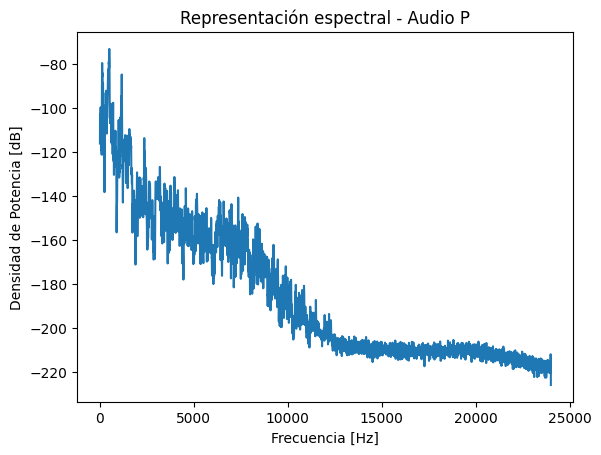

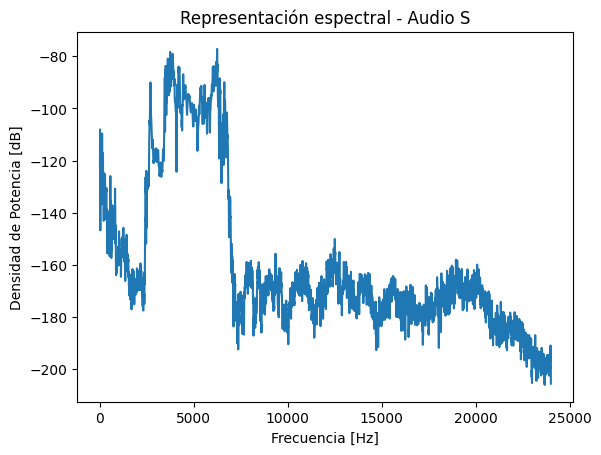

In [45]:
Nc = len(wav_data_c)
Np = len(wav_data_p)
Ns = len(wav_data_s)

dfc = fs_audio_c/Nc
dfp = fs_audio_p/Np
dfs = fs_audio_s/Ns

(fwelch_c , pxx_c) = sp.signal.welch(wav_data_c, fs_audio_c , nfft = Nc, window = 'hamming', nperseg = Nc//16, axis = 0)
(fwelch_p , pxx_p) = sp.signal.welch(wav_data_p, fs_audio_p , nfft = Np, window = 'hamming', nperseg = Np//16, axis = 0)
(fwelch_s , pxx_s) = sp.signal.welch(wav_data_s, fs_audio_s , nfft = Ns, window = 'hamming', nperseg = Ns//16, axis = 0)

#Audio Espectro

plt.figure()
bfrec = fwelch_c <= fs_audio_c/2
plt.plot(fwelch_c, 10*np.log10(2*np.abs(pxx_c[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - Audio C")

plt.figure()
bfrec = fwelch_p <= fs_audio_p/2
plt.plot(fwelch_p, 10*np.log10(2*np.abs(pxx_p[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - Audio P")

plt.figure()
bfrec = fwelch_s <= fs_audio_s/2
plt.plot(fwelch_s, 10*np.log10(2*np.abs(pxx_s[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - Audio S");

Verifico el teorema de Parseval:

In [46]:
#Audio C
area = np.sum(wav_data_c**2)

fft_c = np.fft.fft(wav_data_c.flatten())
energia_espectral = np.mean(np.abs(fft_c)**2) #Mas sencillamente con el valor medio (ver notas)

parseval_c = np.abs(area - energia_espectral)
print(parseval_c)

#Audio P
area = np.sum(wav_data_p**2)

fft_p = np.fft.fft(wav_data_p.flatten())
energia_espectral = np.mean(np.abs(fft_p)**2) #Mas sencillamente con el valor medio (ver notas)

parseval_p = np.abs(area - energia_espectral)
print(parseval_p)

#Audio S
area = np.sum(wav_data_s**2)

fft_s = np.fft.fft(wav_data_s.flatten())
energia_espectral = np.mean(np.abs(fft_s)**2) #Mas sencillamente con el valor medio (ver notas)

parseval_s = np.abs(area - energia_espectral)
print(parseval_s)

0.0009765625
0.00024414062
0.0009765625


Buscamos un error cercano a cero, lo cual verifica nuestros resultados. 

Calculamos el ancho de banda:


Buscamos el índice de la sumatoria en el que se alcanzan valores del 95% y 98% de la potencia acumulada total, entendiendo que la potencia e información de la señal real se encuentra comprendido en ese rango de frecuencias. 

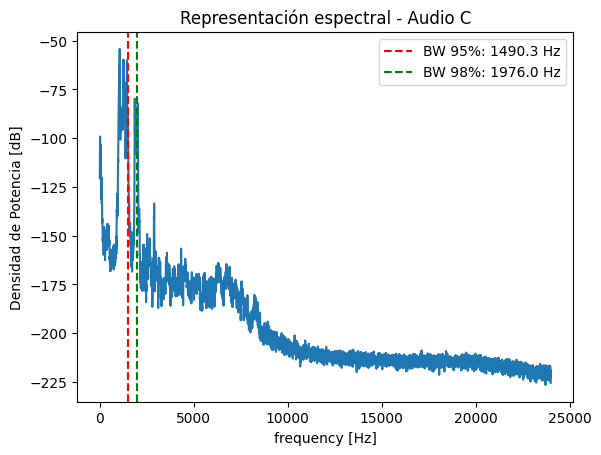

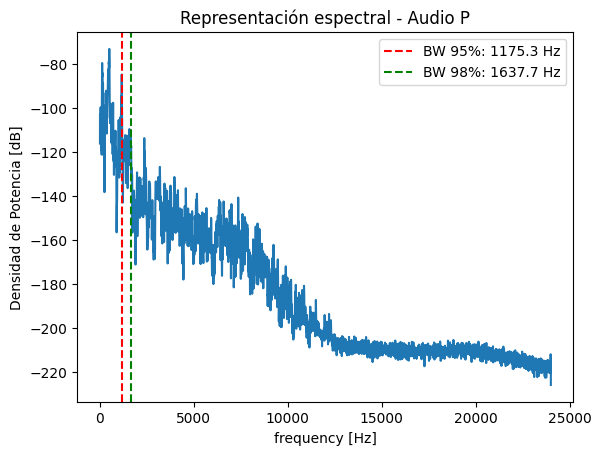

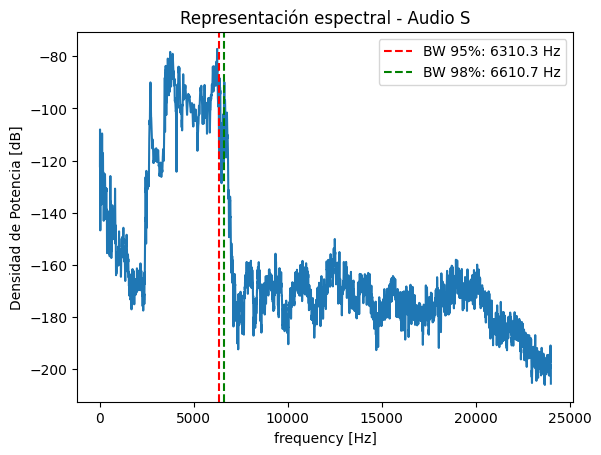

In [47]:
#Potencia total de la señal 
potencia_total_c = np.sum(pxx_c) #Devuelve un valor
potencia_total_p = np.sum(pxx_p) 
potencia_total_s = np.sum(pxx_s) 
    
#Potencia acumulada
potencia_acumulada_c = np.cumsum(pxx_c) #Devuelve un vector con los pasos de la sumatoria
potencia_acumulada_p = np.cumsum(pxx_p) 
potencia_acumulada_s = np.cumsum(pxx_s)

#Umbrales    
umbral_95_c = 0.95 * potencia_total_c
umbral_98_c = 0.98 * potencia_total_c
    
umbral_95_p = 0.95 * potencia_total_p
umbral_98_p = 0.98 * potencia_total_p
    
umbral_95_s = 0.95 * potencia_total_s
umbral_98_s = 0.98 * potencia_total_s

#Indice en el que se llega al umbral
idc_95_c = np.argmax(potencia_acumulada_c >= umbral_95_c)
idc_98_c = np.argmax(potencia_acumulada_c >= umbral_98_c)

idc_95_p = np.argmax(potencia_acumulada_p >= umbral_95_p)
idc_98_p = np.argmax(potencia_acumulada_p >= umbral_98_p)

idc_95_s = np.argmax(potencia_acumulada_s >= umbral_95_s)
idc_98_s = np.argmax(potencia_acumulada_s >= umbral_98_s)
    
#Bw
BW_95_c = fwelch_c[idc_95_c] #Freq a la que se llega al indice
BW_98_c = fwelch_c[idc_98_c]

BW_95_p = fwelch_p[idc_95_p]
BW_98_p = fwelch_p[idc_98_p]

BW_95_s = fwelch_s[idc_95_s]
BW_98_s = fwelch_s[idc_98_s]

#Grafico BW
#Audio C
plt.figure()
bfrec = fwelch_c <= fs_audio_c/2
plt.plot(fwelch_c, 10*np.log10(2*np.abs(pxx_c[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - Audio C")
plt.xlabel('frequency [Hz]')
plt.axvline(BW_95_c, color='r', linestyle='--', label=f'BW 95%: {BW_95_c:.1f} Hz')
plt.axvline(BW_98_c, color='g', linestyle='--', label=f'BW 98%: {BW_98_c:.1f} Hz')
plt.legend()

#Audio P
plt.figure()
bfrec = fwelch_p <= fs_audio_p/2
plt.plot(fwelch_p, 10*np.log10(2*np.abs(pxx_p[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - Audio P")
plt.xlabel('frequency [Hz]')
plt.axvline(BW_95_p, color='r', linestyle='--', label=f'BW 95%: {BW_95_p:.1f} Hz')
plt.axvline(BW_98_p, color='g', linestyle='--', label=f'BW 98%: {BW_98_p:.1f} Hz')
plt.legend()

#Audio S
plt.figure()
bfrec = fwelch_s <= fs_audio_s/2
plt.plot(fwelch_s, 10*np.log10(2*np.abs(pxx_s[bfrec])**2))
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral - Audio S")
plt.xlabel('frequency [Hz]')
plt.axvline(BW_95_s, color='r', linestyle='--', label=f'BW 95%: {BW_95_s:.1f} Hz')
plt.axvline(BW_98_s, color='g', linestyle='--', label=f'BW 98%: {BW_98_s:.1f} Hz')
plt.legend()